# [1] Exploratory Data Analysis

Langkah-langkah umum melakukan EDA:
1. Membaca Dataset student-mat.csv
2. Review Struktur Data
3. Memeriksa Data Kosong
4. Mendeskripsikan Kolom-Kolom Pada Dataset

**1. Membaca Dataset student-mat.csv**

In [ ]:
import pandas as pd
df = pd.read_csv('sample_data/student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


**2. Review Struktur Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

**3. Memeriksa Data Kosong**

In [ ]:
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


**4. Mendeskripsikan Kolom-Kolom Pada Dataset**

[View](https://docs.google.com/spreadsheets/d/1qYz34OvpShw2JvWwFG-MFVl0rF1TM0xK/edit?usp=sharing&ouid=109027938812233825794&rtpof=true&sd=true)

# [2] Analisis Menggunakan Regresi Linear

> **Apakah Variabel G2 Berpengaruh Terhadap Variabel G3?**

Persamaan Regresi: G3 = -1.39 + 1.10 X G2
R²: 0.8188


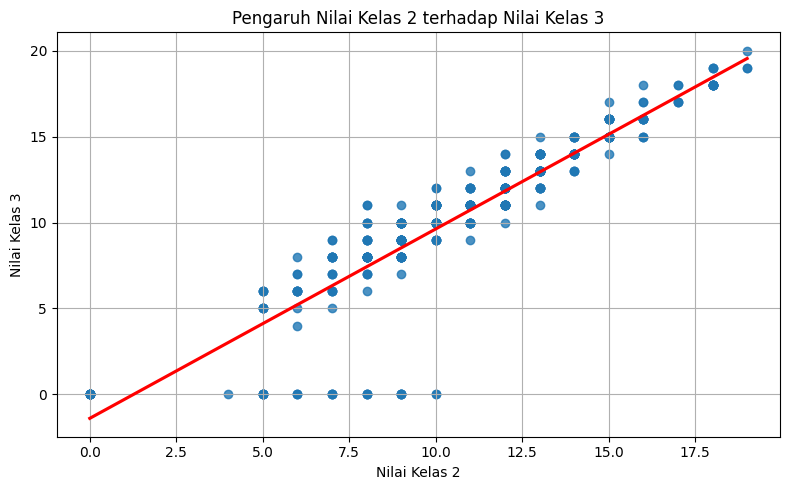

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[['G2']]
y = df['G3']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

slope = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(y, y_pred)

print(f'Persamaan Regresi: G3 = {intercept:.2f} + {slope:.2f} X G2')
print(f'R²: {r2:.4f}')

plt.figure(figsize=(8, 5))
sns.regplot(x='G2', y='G3', data=df, ci=None, line_kws={'color': 'red'})
plt.title('Pengaruh Nilai Kelas 2 terhadap Nilai Kelas 3')
plt.xlabel('Nilai Kelas 2')
plt.ylabel('Nilai Kelas 3')
plt.grid(True)
plt.tight_layout()
plt.show()

> Nilai R² Square = 0,8188 atau sekitar 82% menunjukkan bahwa Variabel G2 (Nilai Kelas 2) memiliki pengaruh yang **KUAT** terhadap Variabel G3 (Nilai Kelas 3).

> Hal ini mengindikasikan bahwa G2 sangat erat kaitannya dengan G3, yang berarti semakin tinggi Nilai G2, maka kemungkinan besar Nilai G3 juga akan meningkat. Dengan demikian, dapat disimpulkan bahwa Variabel G2 berpengaruh signifikan terhadap Variabel G3.

# [3] Clustering Segmentasi Siswa Berdasarkan Absensi

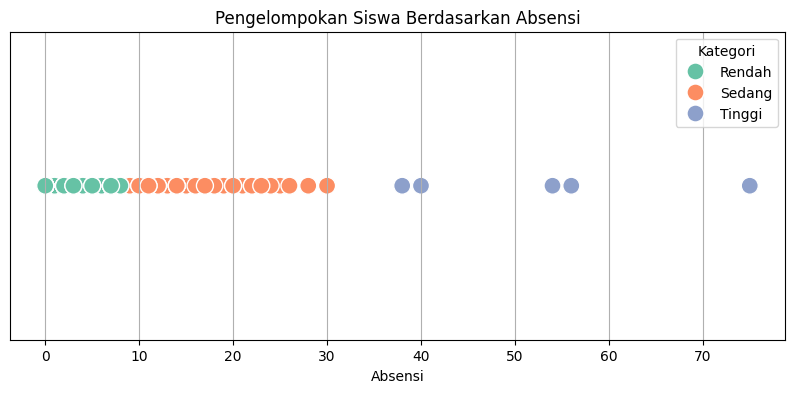

In [ ]:
from sklearn.cluster import KMeans

X = df[['absences']]

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

cluster_centers = kmeans.cluster_centers_.flatten()
sorted_indices = cluster_centers.argsort()

cluster_labels = ['Rendah', 'Sedang', 'Tinggi']
cluster_map = {idx: cluster_labels[i] for i, idx in enumerate(sorted_indices)}

df['Kategori'] = df['cluster'].map(cluster_map)

plt.figure(figsize=(10, 4))
sns.scatterplot(x=df['absences'], y=[0]*len(df), hue=df['Kategori'], palette='Set2', s=150)
plt.title('Pengelompokan Siswa Berdasarkan Absensi')
plt.xlabel('Absensi')
plt.yticks([])
plt.grid(True)
plt.show()

> Berdasarkan hasil pengelompokan dengan menggunakan Algoritma K-Means, absensi siswa dapat diklasifikasikan ke dalam 3 kategori yaitu Rendah, Sedang, dan Tinggi.

> Visualisasi menunjukkan bahwa setiap kelompok siswa memiliki pola absensi yang berbeda-beda. Berdasarkan informasi ini, pihak sekolah diharapkan dapat merencanakan strategi mitigasi terhadap faktor-faktor yang dapat memengaruhi ketidakhadiran siswa di sekolah.

# [4] Klasifikasi Menggunakan Regresi Logistik

> **Apakah Variabel G1 & G2 Berpengaruh Terhadap Variabel G3?**

Akurasi:
 0.9113924050632911

Klasifikasi:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88        27
           1       0.98      0.88      0.93        52

    accuracy                           0.91        79
   macro avg       0.90      0.92      0.91        79
weighted avg       0.92      0.91      0.91        79


Koefisien Regresi:
 G1    0.159826
G2    1.756076
dtype: float64


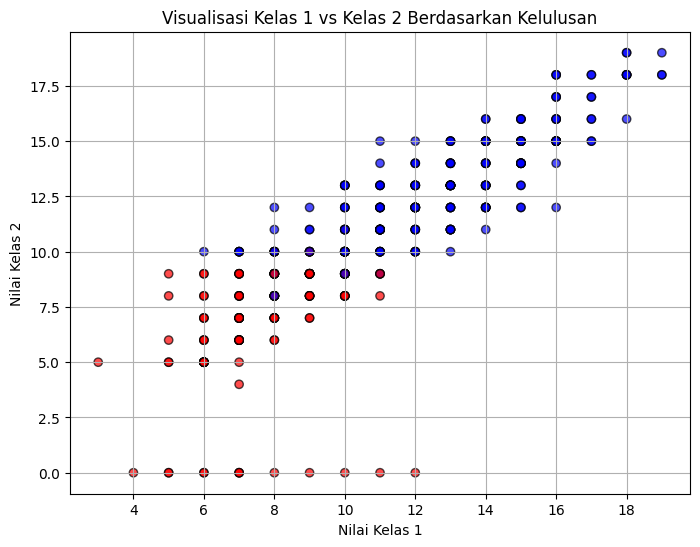

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df['lulus'] = (df['G3'] >= 10).astype(int)

X = df[['G1', 'G2']]
y = df['lulus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Akurasi:\n", accuracy_score(y_test, y_pred))

print("\nKlasifikasi:\n", classification_report(y_test, y_pred))

coef = pd.Series(model.coef_[0], index=X.columns)
print("\nKoefisien Regresi:\n", coef)

colors = df['lulus'].map({0: 'red', 1: 'blue'})
plt.figure(figsize=(8, 6))
plt.scatter(df['G1'], df['G2'], c=colors, edgecolor='k', alpha=0.7)
plt.xlabel('Nilai Kelas 1')
plt.ylabel('Nilai Kelas 2')
plt.title('Visualisasi Kelas 1 vs Kelas 2 Berdasarkan Kelulusan')
plt.grid(True)
plt.show()



> Berdasarkan hasil Analisis diatas, diperoleh bahwa model memiliki tingkat akurasi yang sangat tinggi sebesar 91%. Hal ini menunjukkan bahwa nilai siswa pada Kelas 1 (G1) dan Kelas 2 (G2) memiliki pengaruh yang **SANGAT KUAT** dalam memprediksi Kelulusan Siswa (yang di-assign >= 10).

>Dari hasil pengolahan data, terlihat bahwa nilai G2 memiliki pengaruh yang lebih besar dibandingkan nilai G1 atau bisa disebut semakin tinggi nilai siswa pada Kelas 2, maka peluang siswa untuk lulus juga semakin besar dan model ini juga menunjukkan performa klasifikasi yang baik, terutama dalam mendeteksi siswa yang berpotensi lulus.